# Insights Gained from Analysis of Premier League Data
### Programming with Data Midterm Report
##### By: Garrison Jabs

## Introduction
<p>Since its inception on the 20th of February 1992, the English Premier League has become one of the most watched sport leagues in the world. On broadcast the league reaches an approximate audience size of 4.7 billion people. The league draws this attention by being almost impossible to predict. Of 7 teams to take home the title, three have been considered not even in the running to win, making them a complete upset. In this project, I am going to investigate a few instances of league seasons, to see if some of the age-old beliefs that have sprung up in soccer are true. For instance, that goals scored in the first half of the game are more valuable. </p>
<p>The first thing to do is acquire some data about the Premier League. I first attempted to gain access to a web API, hosting stats on the League. However, as most API data is locked behind a pay wall. I decided to scrape some useful data from <a href="https://www.football-data.co.uk/englandm.php">https://www.football-data.co.uk/englandm.php"</a> which hosts freely available data from 1993 to the current year in downloadable CSV documents. </p>


In [1]:
# importing "BeautifulSoup" a web scraping library and "requests" a server
# access library

from bs4 import BeautifulSoup
import requests

<p>To access the data behind the webpage with BeautifulSoup, much like with a web browser, we need to use the web address. I created these two variables to make scripting easier down the line. </p>

In [2]:
# link to British football league data
url ="https://www.football-data.co.uk/englandm.php"

# link for accessing the csv files
url2 = "https://www.football-data.co.uk/"

<p>The Requests library makes accessing server-side data much easier. It handles all query’s automatically, and makes checking response status of the request easy. </p>

In [3]:
# server request to obtain the football-data.co.uk webpage
page = requests.get(url)

#check to see the server response is good. A response of 200 is what we want.
if page.status_code == 200:
    # parses the html markup on the page with pythons built in parser
    soup = BeautifulSoup(page.content, 'html.parser')

<p>After scraping the webpage for the HTML document, we need to filter the data down to just the links that lead to the desired CSV documents</p>

In [4]:
# Empty list for storing the page data that we are looking for 
data = []

# Finds and builds a list of all html objects with the <a> tag
allLinks = soup.find_all('a')

for link in allLinks:
    # grabs the href attribute from the all Links list
    sportsData = link.attrs['href']
    # filters just the premier league 
    if sportsData[13:19] == "E0.csv":
        # builds the web address to the data file
        data.append(url2 + sportsData)

<p>Now that the list of all the links has been built, we can read the CSV files into a panda data frame for analysis. </p>

In [5]:
# Importing pandas and numpy to process the data
import pandas as pd
import numpy as np

# Importing matplotlib for data visualisation 
import matplotlib.pyplot as plt

# Functions created by me, stored in separate file for the purpose of simplifying code
import dataAnalysis as da

<p>The CSV data columns were labeled in ways that were not easy to read initially. However, a legend was included on the website at this link. <a href="https://www.football-data.co.uk/notes.txt">https://www.football-data.co.uk/notes.txt</a> that clarified the naming scheme.</p>

In [6]:
# Reading the CSV files for the premier league seasons 2015 - 2019

s2019 = pd.read_csv(data[1], sep=",", index_col=0)
s2018 = pd.read_csv(data[2], sep=",", index_col=0)
s2017 = pd.read_csv(data[3], sep=",", index_col=0)
s2016 = pd.read_csv(data[4], sep=",", index_col=0)
s2015 = pd.read_csv(data[5], sep=",", index_col=0)


<p>The date was missing from two of the seasons data, but the date range was known, so I added a generic date for analysis reasons.</p>

In [7]:
# fills the date column with the date string

s2016['Date'] = '2016/2017'
s2015['Date'] = '2015/2016'

In [8]:
# Concatenating all 5 seasons for later analysis

allData = pd.concat([s2015, s2016, s2017, s2018, s2019])

In [9]:
s2015.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
Div,,,,,,,,,,,,,,,,,,,,,
E0,2015/2016,Bournemouth,Aston Villa,0,1,A,0,0,D,M Clattenburg,...,1.79,26,-0.5,1.98,1.93,1.99,1.92,1.82,3.88,4.70
E0,2015/2016,Chelsea,Swansea,2,2,D,2,1,H,M Oliver,...,1.99,27,-1.5,2.24,2.16,1.80,1.73,1.37,5.04,10.88
E0,2015/2016,Everton,Watford,2,2,D,0,1,A,M Jones,...,1.96,26,-1.0,2.28,2.18,1.76,1.71,1.75,3.76,5.44
E0,2015/2016,Leicester,Sunderland,4,2,H,3,0,H,L Mason,...,1.67,26,-0.5,2.00,1.95,1.96,1.90,1.79,3.74,5.10
E0,2015/2016,Man United,Tottenham,1,0,H,1,0,H,J Moss,...,2.01,26,-1.0,2.20,2.09,1.82,1.78,1.64,4.07,6.04


<p>The data source included stats required for gambling on different platforms. This was far more data then required for my analyses. Therefore, I built a data frame focused on only the essential columns I wanted to work with.</p>

In [10]:
# minimises the data frame to the columns I am working with
s2019 = s2019[s2019.columns[:22]]
s2018 = s2018[s2018.columns[:22]]
s2017 = s2017[s2017.columns[:22]]
s2016 = s2016[s2016.columns[:22]]
s2015 = s2015[s2015.columns[:22]]

allData = allData[allData.columns[:22]]

<p>Now that the data is in a workable format and only the essential components are included, let’s print a small sample of the data and begin to explore it. </p>

In [11]:
# a sample of the munged data
s2015.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
Div,,,,,,,,,,,,,,,,,,,,,
E0,2015/2016,Bournemouth,Aston Villa,0,1,A,0,0,D,M Clattenburg,...,2,3,13,13,6,3,3,4,0,0
E0,2015/2016,Chelsea,Swansea,2,2,D,2,1,H,M Oliver,...,3,10,15,16,4,8,1,3,1,0
E0,2015/2016,Everton,Watford,2,2,D,0,1,A,M Jones,...,5,5,7,13,8,2,1,2,0,0
E0,2015/2016,Leicester,Sunderland,4,2,H,3,0,H,L Mason,...,8,5,13,17,6,3,2,4,0,0
E0,2015/2016,Man United,Tottenham,1,0,H,1,0,H,J Moss,...,1,4,12,12,1,2,2,3,0,0


<p>From the sample section of the data, we can see that the data covers many points of interest that can be used to discover interesting insights. For example, it Includes end of game results (FTR), where an "A" indicates an away team win, an "H" indicates a home team win and a "D" indicates a draw. It also includes the game standings at half time (HTR) with similar indicator variables. The data breaks down goal count for each team, both at half time and full time (ex. Half Time Away Goals "HTAG", Half Time Home Goals "HTHG"), and among others it includes shots on goal (HST, AST). This data set should be suitable for exploring the premier league.

## Data Analysis
<p>The main question I am going to try and answer is; Are the goals scored in the first half of the game more important than goals scored later in the game? </p>
<p>Lets begin by looking at the full time Results (FTR) vs the half time results (HTR). The initial goal was to measure, the ratio of total games, who’s score at the half time point stayed the same in the final half of the game. In other words, the total ratio of games, that had been decided at the half time buzzer. In order to do this properly, we need to first eliminate any games where the final goal total is different then the half time goal total. This was done with a function I wrote that filters the data frame to the games that didn’t change. The function then builds and returns a dict filled in order with the total games in a season, total games with no change, and the ratio. </p>

In [12]:
# builds a dict containing the total games played, 
# the total games that didnt change, and the ratio of the two
allSe = da.percentageNoChange(allData)
se15 = da.percentageNoChange(s2015)
se16 = da.percentageNoChange(s2016)
se17 = da.percentageNoChange(s2017)
se18 = da.percentageNoChange(s2018)
se19 = da.percentageNoChange(s2019)

<p>In order to graph the output, I then built a list with the ratios from the 5 seasons, as well as the ratio from all the seasons combined.</p>

In [13]:
# builds a list of the ratios for the 5 seasons of games decided by half time

percentage = []

percentage.append(se15['percentage'])
percentage.append(se16['percentage'])
percentage.append(se17['percentage'])
percentage.append(se18['percentage'])
percentage.append(se19['percentage'])
percentage.append(allSe['percentage'])

# numpy array for graphing purposes
percentage = np.array(percentage)

<p>Now that the data has been formatted we can graph it in a bar chart with the average ratio marked as a red line.</p>

Text(0, 0.5, 'Percentage')

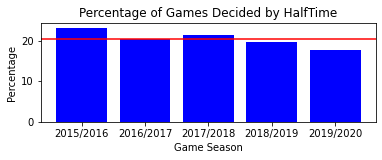

In [14]:
# Plots the ratio of games with no score change in the second half of the 
# game

plt.figure()
plt.subplot(211)
plt.bar('2015/2016',percentage[0], color = 'blue')
plt.bar('2016/2017',percentage[1], color = 'blue')
plt.bar('2017/2018',percentage[2], color = 'blue')
plt.bar('2018/2019',percentage[3], color = 'blue')
plt.bar('2019/2020',percentage[4], color = 'blue')
plt.axhline(percentage[5], color = 'red')
plt.title('Percentage of Games Decided by HalfTime')
plt.xlabel('Game Season')
plt.ylabel('Percentage')


<p>We can see from the horizontal red line on the bar chart, that approximately 20% of all games played were decided within the first 45 min of play. </p>
<p>This number is significant. However, it doesn’t tell us the outcome of the game (ex. Who won/lost or if the game was a draw?). It also indicates, that approximately 80% of all games were decided in the second half. Lets further explore this idea, by comparing the number of goals scored in the first 45 min, to the number scored in the last 45 min in the 5 seasons. </p>

In [15]:
# builds a list of 3 elements goals scored in the first half, goals scored in the second half and all goals scored, 

se2015 = np.array(da.goalsScored(s2015))
se2016 = np.array(da.goalsScored(s2016))
se2017 = np.array(da.goalsScored(s2017))
se2018 = np.array(da.goalsScored(s2018))
se2019 = np.array(da.goalsScored(s2019))

<p>We can now plot the graph to see the comparison.</p>

Text(0, 0.5, 'Goals Scored')

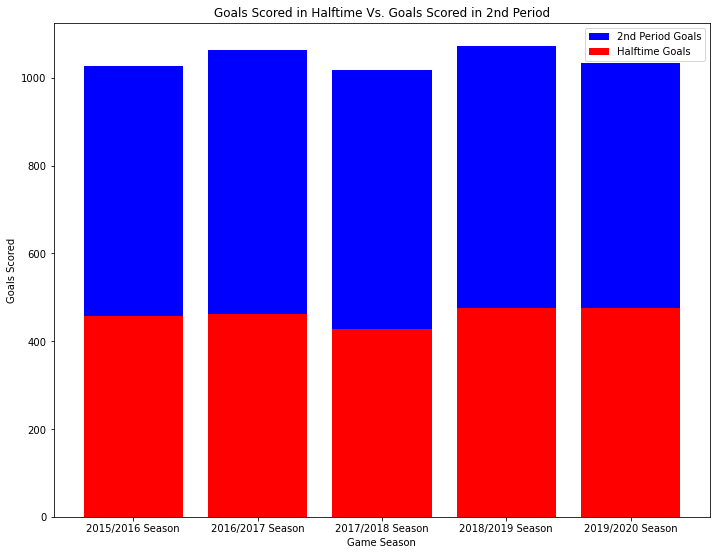

In [16]:
# Plots the goals scored in the first half of the game Vs the 2nd half of the
# game.

plt.figure(figsize=(40,20))
plt.subplot(231)
plt.bar('2015/2016 Season',se2015[2], color='blue', label="2nd Period Goals")
plt.bar('2015/2016 Season',se2015[0], color='red', label="Halftime Goals")
plt.bar('2016/2017 Season',se2016[2], color='blue')
plt.bar('2016/2017 Season',se2016[0], color='red')
plt.bar('2017/2018 Season',se2017[2], color='blue')
plt.bar('2017/2018 Season',se2017[0], color='red')
plt.bar('2018/2019 Season',se2018[2], color='blue')
plt.bar('2018/2019 Season',se2018[0], color='red')
plt.bar('2019/2020 Season',se2019[2], color='blue')
plt.bar('2019/2020 Season',se2019[0], color='red')
plt.title('Goals Scored in Halftime Vs. Goals Scored in 2nd Period')
plt.legend()
plt.xlabel('Game Season')
plt.ylabel('Goals Scored')

In [17]:
# prints the ratio of goals scored in the 2nd half of the game

print()
print("The respective ratio of goals scored in the second half are as follows.\n")
print('Percentage of goals scored in the second half of the 2015/2016 season '+str(da.percent(se2015))+'%')
print('Percentage of goals scored in the second half of the 2016/2017 season '+str(da.percent(se2016))+'%')
print('Percentage of goals scored in the second half of the 2017/2018 season '+str(da.percent(se2017))+'%')
print('Percentage of goals scored in the second half of the 2018/2019 season '+str(da.percent(se2018))+'%')
print('Percentage of goals scored in the second half of the 2019/2020 season '+str(da.percent(se2019))+'%')


The respective ratio of goals scored in the second half are as follows.

Percentage of goals scored in the second half of the 2015/2016 season 55%
Percentage of goals scored in the second half of the 2016/2017 season 56%
Percentage of goals scored in the second half of the 2017/2018 season 58%
Percentage of goals scored in the second half of the 2018/2019 season 55%
Percentage of goals scored in the second half of the 2019/2020 season 54%


<p>We can see from the graph and the calculated ratios. That in any given season, just over half of all goals scored, are in the second half of the game. Logically this makes sense, as players get tired and defence men might begin to make mistakes. However, this does not answer the original question of, are goals scored before halftime more important? So, lets explore how many teams that were leading in goals in the first half of the game, ended up winning the match. </p>

In [18]:
# first we need to explore, which teams were considered winning before halftime
# and still winning after halftime

# isolates all games where the expected results at half time were == to final results
equalResults = s2019[s2019['HTR'] == s2019['FTR']]

# eliminates all games that resulted in a draw
totalWins = equalResults[equalResults['HTR'] != 'D']

#total number of games won
total = len(totalWins['HTR'])

#calculates the ratio of games won
prec = da.percent([0, total, len(s2019)])

In [24]:
# prints the discriptive dialog about insites gained

print("\n\nThe total number of games that were predicted by the half time results in the 2019 season was: " + str(total))
print("\nOf 380 games in a season, 176 is a little under half of all games played.")
print("The ratio of games that were won as predicted, works out to be about "+str(prec)+"%")
print("This implies that there is some truth to the higher importance of goals scored early.")
print("However, this is not a definitive solution to the question. As other factors, such as")
print("home team advantage, injury, number of shots on goal and the general skill level of")
print("different teams could also drastically affect the outcome.")



The total number of games that were predicted by the half time results in the 2019 season was: 176

Of 380 games in a season, 176 is a little under half of all games played.
The ratio of games that were won as predicted, works out to be about 61%
This implies that there is some truth to the higher importance of goals scored early.
However, this is not a definitive solution to the question. As other factors, such as
home team advantage, injury, number of shots on goal and the general skill level of
different teams could also drastically affect the outcome.


<p>To investigate the potential of home team advantage, lets look at the number of games won by away team Vs. home team.</p>

In [20]:
#season 2019 dataFrame
totalWins = s2019[s2019['FTR'] != 'D']
# Isolates just the games won by away teams
awayT= totalWins[totalWins['FTR'] != 'H']
# Isolates just the games won by home teams
homeT= totalWins[totalWins['FTR'] != 'A']
# counts the number of games for the purpose of graphing
awayGames = list(range(0,len(awayT['HTR'])))
homeGames = list(range(0,len(homeT['HTR'])))

Text(0, 0.5, 'Goals Scored')

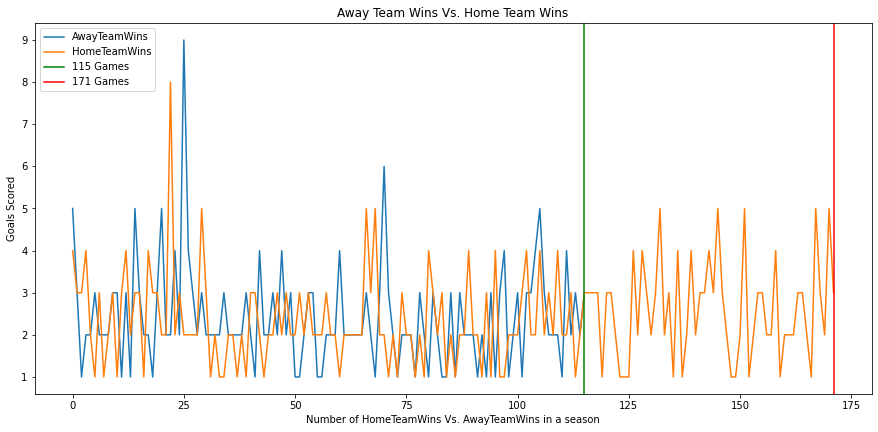

In [21]:
# Plots the total Away team wins Vs. total Home team wins

plt.figure(figsize =(15,15))
plt.subplot(211)
plt.plot(awayGames,awayT['FTAG'],label="AwayTeamWins")
plt.plot(homeGames,homeT['FTHG'],label="HomeTeamWins")
plt.axvline(len(awayT['HTR'])-1, color = 'green',label="115 Games")
plt.axvline(len(homeT['HTR'])-1, color = 'red', label="171 Games")
plt.title('Away Team Wins Vs. Home Team Wins')
plt.legend()
plt.xlabel('Number of HomeTeamWins Vs. AwayTeamWins in a season')
plt.ylabel('Goals Scored')

<p>The graph indicates that of the 286 games resulting in a win, in the 2019 season. The teams that were playing on home turf won 56 more games then teams that were playing away. This indicates that there may be something significant to the idea of home team advantage. However, it would require looking into more seasons to see if this trend held true for all of them. Also, it would be worth comparing home team advantage, to goals scored in the first half of the game, to see if one of these ideas held more importance then the other.</p>
<p>A further question of interest related to the importance of the timing of goals would be; What ratio of the total games resulting in a win were predicted by the results of the first half of the game?</p>

In [25]:
# calculates the ratio of games that were predicted by 
# half time results out of total games that ended in a win
prec = da.percent([0,176,286])
print("\nOf the 286 wins 176 were teams that went into the second period with a goal advantage.")
print("This is roughly "+str(prec)+"% of all wins in the 2019 season.")


Of the 286 wins 176 were teams that went into the second period with a goal advantage.
This is roughly 61% of all wins in the 2019 season.


<p>The ratio of total wins, to teams with half time adavantage. that later went on to win match, Is roughly 61%. While this by itself again, doesn’t definitively prove that goals before halftime are more important, it does lend credibility to the idea.</p>

## Conclusion
<p>
Through the process of investigating the idea, that the timing of certain goals held more value. We were able to establish a certain amount of credibility in that way of thinking. However, we were not able to definitively prove, that the goals before half time had more significance, other then raising the odds of winning overall. Take for instance the ratio of 61% of all wins were from teams, that were ahead in goals at half time. This neglects to account for the distance between goal amounts, which would be an indicator of the difficulty of catching up. It also ignores the value that more shots on goal, raises the odds of getting more goals. Which could be an indicator of an unevenly matched team. Finally, the study didn’t take into account the drastic effects, that an unexpected injury of a player can have on the overall game.
</p>

## Future Work
<p>
To extend this study in the future, accounting for a larger spread of data, would allow establishing the size of the average across all seasons. Indicating the true value of early goals as a predictor for the success of the winning team. Furthermore, including player stats (ex. shots on goal, fouls, playtime) and comparing them to each other, could help establish whether the skill of a team is a better indicator of success.
</p>

## References
<p>
    <li><em>wikipedia</em> "Premier League" <a href="https://en.wikipedia.org/wiki/Premier_League">https://en.wikipedia.org/wiki/Premier_League</a> Accessed: December 2020</li>
    <li><em>Real Python:</em> "Beautiful Soup: Build a Web Scraper With Python" <a href="https://realpython.com/beautiful-soup-web-scraper-python/#part-1-inspect-your-data-source">https://realpython.com/beautiful-soup-web-scraper-python/#part-1-inspect-your-data-source</a> Accessed: December 2020</li>
    <li><em>Beautiful Soup Documentation</em> <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">https://www.crummy.com/software/BeautifulSoup/bs4/doc/</a> Accessed: December 2020</li>
    <li><em>Football - Data:</em> Premier League Data Set - <a href="https://www.football-data.co.uk/englandm.php">https://www.football-data.co.uk/englandm.php</a> Accessed: December 2020</li>
    <li><em>matplotlib documentation:</em> - <a href="https://matplotlib.org/contents.html">https://matplotlib.org/contents.html</a> Accessed: December 2020</li>
    <li><em>pandas Documentation:</em> - <a href="https://pandas.pydata.org/docs/user_guide/index.html">https://pandas.pydata.org/docs/user_guide/index.html</a> Accessed: December 2020</li>
</p>
